In [162]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.preprocessing.image import load_img , img_to_array,ImageDataGenerator , array_to_img
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Conv2D , Flatten , MaxPooling2D ,Dense
from keras.metrics import Precision , Recall

### Collecting data using data augmentation technique , preparing  a data generator object which will create scaled images at runtime

In [453]:
##### preparing data augmentation object 
datagen=ImageDataGenerator(rescale=1./255)

#### Note: After scraping all data , test data is manually created by moving 100 images of each category in Test_data folder

In [495]:
data=datagen.flow_from_directory('Data/', target_size=(224,224), batch_size=32 , class_mode='categorical')

Found 1517 images belonging to 3 classes.


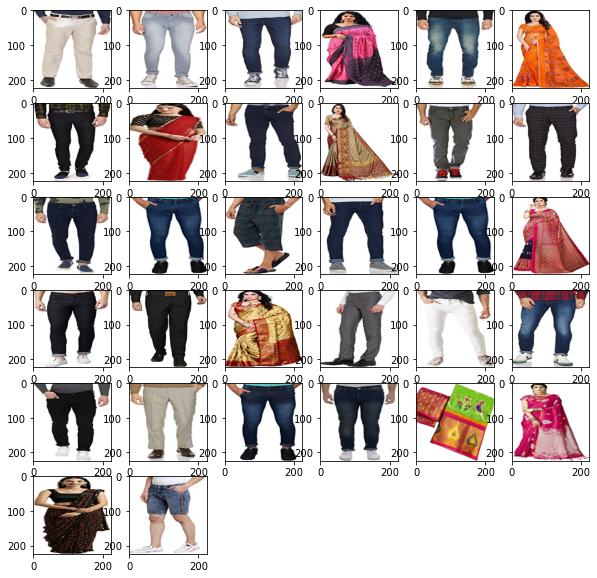

In [496]:
############# checking images for only first batch generated by flow from directory method i.e, train_data[0]
plt.figure(figsize=(10,10))
k=1
for i in data[0][0]:
    plt.subplot(6,6,k)
    plt.imshow(array_to_img(i))
    k+=1

In [497]:
########### one hot representation of target
data[0][1]

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Preparing a CNN with randomly chosen filters and layers

In [498]:
#### preparing train and test data
import numpy as np
X=data[0][0]
Y=data[0][1]
for i in range(len(data)-1):
    X=np.concatenate((X,data[i+1][0]))    
    Y=np.concatenate((Y,data[i+1][1]))  

In [499]:
### preparing more data by augmenting the images
additional_data_generator=ImageDataGenerator(rotation_range= 30 , shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
add_data=additional_data_generator.flow(X,Y , batch_size=32)


In [500]:
## separating x and y from the newly created data
new_x=add_data[0][0]
new_y=add_data[0][1]
for i in range(len(add_data)-1):
    new_x=np.concatenate((new_x,add_data[i+1][0]))    
    new_y=np.concatenate((new_y,add_data[i+1][1]))  

In [501]:
print(X.shape, Y.shape , new_x.shape , new_y.shape)

(1517, 224, 224, 3) (1517, 3) (1517, 224, 224, 3) (1517, 3)


In [502]:
### merging original and newly created data
X=np.concatenate((X,new_x))
Y=np.concatenate((Y,new_y))

In [503]:
print(X.shape, Y.shape )

(3034, 224, 224, 3) (3034, 3)


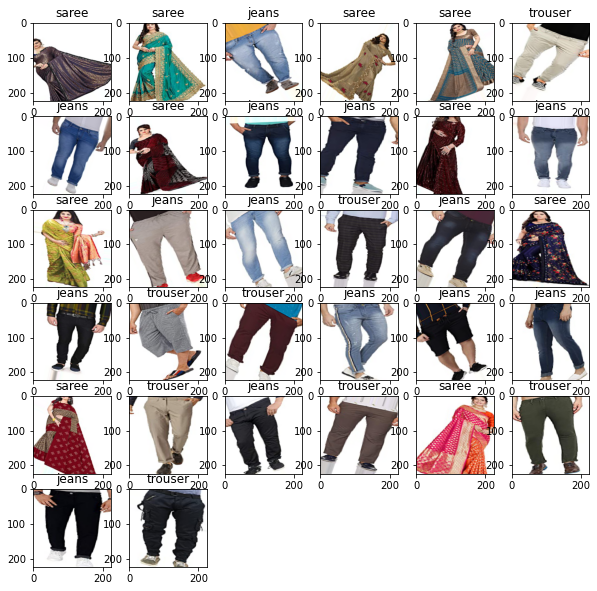

In [512]:
## checking the final X  and Y
plt.figure(figsize=(10,10))
k=1
for i in range(3000,3032):
    plt.subplot(6,6,k)
    plt.imshow(array_to_img(X[i]))
    class_=np.argmax(Y[i])
    if(class_==0):plt.title('jeans')
    if(class_==1):plt.title('trouser')
    if(class_==2):plt.title('saree')
    k+=1

In [513]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [514]:

model_=Sequential()

model_.add( Conv2D(64,input_shape=(224,224,3), kernel_size=(3,3) ,activation='relu') )
model_.add(MaxPooling2D(3,3))
model_.add( Conv2D(64, kernel_size=(3,3), activation='relu') )
model_.add( Conv2D(32, kernel_size=(3,3), activation='relu') )
model_.add(MaxPooling2D(2,2))
model_.add( Conv2D(32, kernel_size=(3,3), activation='relu') )
model_.add( Flatten() )
model_.add( Dense(3, activation='softmax') )
model_.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy',Precision(), Recall()])

In [515]:
model_.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 70, 70, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 33, 33, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 34848)            

In [517]:
model_.fit(x_train,y_train, epochs=4 , batch_size=30   )

Epoch 1/4
81/81 [==============================] - 151s 2s/step - loss: 0.3978 - accuracy: 0.8150 - precision_1: 0.8180 - recall_1: 0.8076
Epoch 2/4
81/81 [==============================] - 140s 2s/step - loss: 0.3545 - accuracy: 0.8492 - precision_1: 0.8540 - recall_1: 0.8438
Epoch 3/4
81/81 [==============================] - 145s 2s/step - loss: 0.3217 - accuracy: 0.8686 - precision_1: 0.8701 - recall_1: 0.8611
Epoch 4/4
81/81 [==============================] - 139s 2s/step - loss: 0.2832 - accuracy: 0.8879 - precision_1: 0.8891 - recall_1: 0.8855


In [518]:
model_.evaluate(x_test,y_test)

19/19 [==============================] - 11s 529ms/step - loss: 0.4656 - accuracy: 0.8369 - precision_1: 0.8405 - recall_1: 0.8336


[0.46564626693725586,
 0.8369027972221375,
 0.840531587600708,
 0.8336079120635986]

#### Checking overfitting

In [519]:
####### defining a ImageDataGenerator object to prepare testing data (by augmentation) and testing the above model
testing_data_generator=ImageDataGenerator(rotation_range= 30 , shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
data=testing_data_generator.flow(x_test,y_test , batch_size=32)



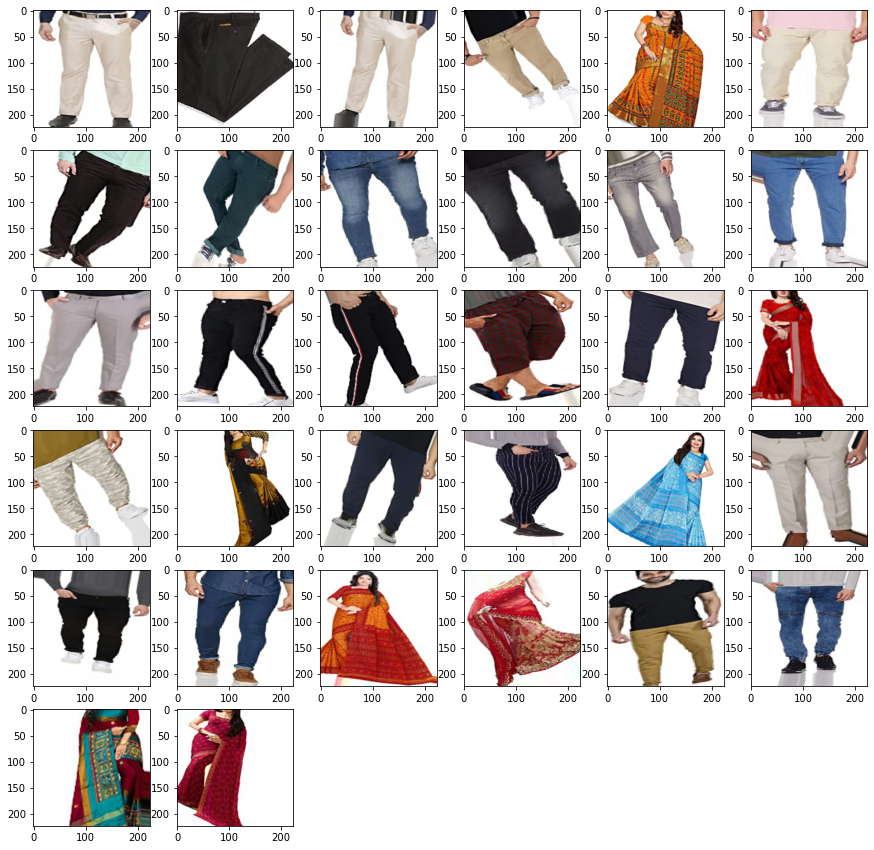

In [520]:
#### testing whether augmentation working fine or not
plt.figure(figsize=(15,15))
k=1
for i in data[0][0]:
    plt.subplot(6,6,k)
    plt.imshow(array_to_img(i))
    k+=1

* Image augmentation working fine

In [521]:
### checking 5 iterations of augmentaed data...in each iteration data will have randomly transformed images 
for i in range(5):
    model_.evaluate(data)

19/19 [==============================] - 15s 797ms/step - loss: 0.5026 - accuracy: 0.8188 - precision_1: 0.8217 - recall_1: 0.8122


* model is not overfitted

#### Performing hyperparameter tuning to get more better results

In [106]:
from kerastuner.tuners import RandomSearch

In [374]:
### defining a early stopping object to stop the execution of the trial where loss is not decreasing and jumping to next trial
EARLY_STOPPING_PATIENCE =2
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor="loss",
    patience=EARLY_STOPPING_PATIENCE,
    mode='min',
    restore_best_weights=False,
    baseline=1
)

In [417]:
def model_builder(hp):
    model=Sequential()
    model.add( Conv2D(hp.Int('conv1', 32,128,32),input_shape=(224,224,3), kernel_size=(3,3) ,activation='relu'))
    model.add(MaxPooling2D(3,3))
    for i in range(hp.Int('layers',2,10)):        
        model.add(
            Conv2D( filters=hp.Int('conv2'+str(i) , min_value=32 , max_value=100, step=32), kernel_size=(3,3) , activation='relu')
                 )
    model.add(MaxPooling2D(2,2))
    model.add( Conv2D(hp.Int('conv3', 32,128,32), kernel_size=(3,3), activation='relu') )
    model.add(Flatten())
    model.add(Dense(3 , activation='softmax'))
    model.compile(loss='categorical_crossentropy' , 
                  optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2])),
                  metrics=['accuracy']
                 )
    return model

In [418]:
import os
_tuner_= RandomSearch(
        model_builder,
        objective='val_accuracy',
        max_trials= 3,
        executions_per_trial=2,
        directory='Image_classification_dir_17',
        project_name=os.path.normpath('C:/Users/guptaek/fliprobo_files/Image Scraping and Classification Project/dir17')
)

In [377]:
tuner__.search_space_summary()

Search space summary
Default search space size: 6
conv1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
conv20 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
conv21 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
conv3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01], 'ordered': True}


In [419]:
_tuner_.search(x_train,y_train , epochs=5, validation_data=(x_test,y_test) , callbacks=[es] )

Trial 3 Complete [00h 19m 52s]
val_accuracy: 0.37828946113586426

Best val_accuracy So Far: 0.37828946113586426
Total elapsed time: 00h 50m 23s
INFO:tensorflow:Oracle triggered exit


In [437]:
_tuner_.results_summary()

Results summary
Results in C:\Users\guptaek\fliprobo_files\Image Scraping and Classification Project\dir17
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv1: 32
layers: 8
conv20: 64
conv21: 96
conv3: 32
learning_rate: 0.01
conv22: 32
conv23: 96
conv24: 96
conv25: 64
conv26: 64
conv27: 32
Score: 0.37828946113586426
Trial summary
Hyperparameters:
conv1: 96
layers: 8
conv20: 64
conv21: 64
conv3: 96
learning_rate: 0.01
conv22: 32
conv23: 32
conv24: 32
conv25: 32
conv26: 32
conv27: 32
Score: 0.35361841320991516
Trial summary
Hyperparameters:
conv1: 96
layers: 4
conv20: 64
conv21: 64
conv3: 64
learning_rate: 0.01
conv22: 32
conv23: 32
Score: 0.32894736528396606


* No good model can be found hence finalizing the first model